## Part 1: 


\begin{align}
L &= \sum(M_{ij} - U_iV_j^T)^2 + \lambda(\sum||U_i||^2+\sum||V_j||^2) \\
\frac{\partial L}{\partial U} &=-2(M-UV^T)V+2 \lambda U \\
&=U=MV(V^TV+\lambda I)^{-1}
\end{align}


### Pseudocode

initialize U, V

while not converged:<br />

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for i = 1...100 do <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ U=MV(V^TV+\lambda I)^{-1}$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; end for <br/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for i = 1...100 do <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ V=MU(U^TU+\lambda I)^{-1}$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; end for



In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# initialize
train = np.genfromtxt('Q2_train.csv', delimiter=',')
test = np.genfromtxt('Q2_test.csv', delimiter=',')

train_mask = np.nonzero(train)
test_mask = np.nonzero(test)


i,j = train.shape
iters = 100
lmbda = .01
d = 20

U =  np.random.random((i,d))
V =  np.random.random((j,d))

In [15]:
# ALS

train_mse = []
test_mse = []
for _ in range(100):
    
    for itr in range(iters):
        U = (train@V)@np.linalg.inv(V.T@V + np.eye(d)*lmbda)

    for itr in range(iters):
        V = (train.T@U)@np.linalg.inv(U.T@U + np.eye(d)*lmbda)
        
    test_mse.append(mean_squared_error(test[test_mask], (U@V.T)[test_mask]))
    train_mse.append(mean_squared_error(train[train_mask], (U@V.T)[train_mask]))

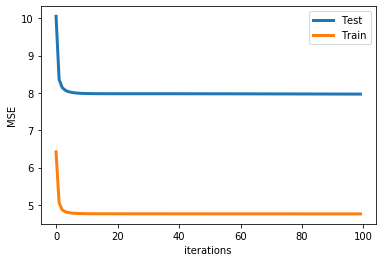

In [16]:
plt.plot(test_mse, label = 'Test', linewidth = 3)
plt.plot(train_mse, label = 'Train', linewidth = 3)
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')